In [1]:
import pandas as pd
import numpy as np


df = pd.read_csv("data.csv",encoding='unicode_escape')
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [3]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [4]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
df.dropna(subset=['Description'], inplace=True)
df.dropna(subset=['CustomerID'], inplace=True)
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [6]:
df.nunique()

InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
dtype: int64

In [7]:
df["Country"].value_counts()

Country
United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45


In [8]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

Features that describe customer buying behavior are Quantity, InvoiceDate, and UnitPrice.

In [9]:
df_customer = df[["Quantity","InvoiceDate","UnitPrice"]]
df_customer

,Quantity,InvoiceDate,UnitPrice
0,6,12/1/2010 8:26,2.55
1,6,12/1/2010 8:26,3.39
2,8,12/1/2010 8:26,2.75
3,6,12/1/2010 8:26,3.39
4,6,12/1/2010 8:26,3.39
...,...,...,...
541904,12,12/9/2011 12:50,0.85
541905,6,12/9/2011 12:50,2.10
541906,4,12/9/2011 12:50,4.15
541907,4,12/9/2011 12:50,4.15


In [10]:
df_customer["InvoiceDate"] = pd.to_datetime(df_customer["InvoiceDate"])
df_customer["InvoiceDate"] = df_customer["InvoiceDate"].astype('int64')
df_customer

C:\Users\tonyp\AppData\Local\Temp\ipykernel_12144\2300233898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customer["InvoiceDate"] = pd.to_datetime(df_customer["InvoiceDate"])
C:\Users\tonyp\AppData\Local\Temp\ipykernel_12144\2300233898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customer["InvoiceDate"] = df_customer["InvoiceDate"].astype('int64')


,Quantity,InvoiceDate,UnitPrice
0,6,1291191960000000000,2.55
1,6,1291191960000000000,3.39
2,8,1291191960000000000,2.75
3,6,1291191960000000000,3.39
4,6,1291191960000000000,3.39
...,...,...,...
541904,12,1323435000000000000,0.85
541905,6,1323435000000000000,2.10
541906,4,1323435000000000000,4.15
541907,4,1323435000000000000,4.15


In [11]:
df_customer["InvoiceDate"].value_counts()

InvoiceDate
1321284420000000000    543
1322495640000000000    534
1323105420000000000    530
1322055540000000000    444
1320070140000000000    436
                      ... 
1311851820000000000      1
1311851760000000000      1
1311850380000000000      1
1311850200000000000      1
1311850140000000000      1
Name: count, Length: 20460, dtype: int64

K-Means

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
transformer = PowerTransformer(method='yeo-johnson')
transformed = transformer.fit_transform(df_customer)

c:\Users\tonyp\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:208: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


In [13]:
customers_transformed = pd.DataFrame(transformed, index=df_customer.index, columns=df_customer.columns)
customers_transformed.head()

,Quantity,InvoiceDate,UnitPrice
0,-0.025727,-1.905612,0.335388
1,-0.025727,-1.905612,0.670250
2,-0.017666,-1.905612,0.425357
3,-0.025727,-1.905612,0.670250
4,-0.025727,-1.905612,0.670250


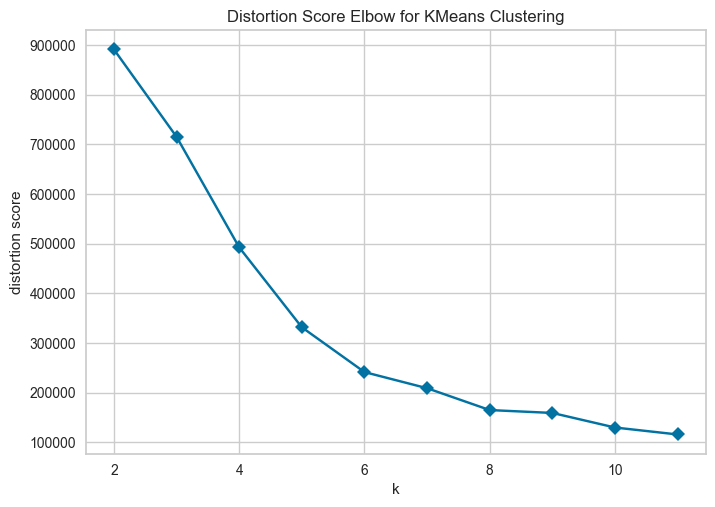

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), timings=False, locate_elbow=False)
visualizer.fit(customers_transformed)  
visualizer.show()

Going off the elbow method it seems that 6 would be a good number of clusters to use here.

In [19]:
X = customers_transformed.sample(100).drop('UnitPrice', axis = 1)
Y = customers_transformed.sample(100)['UnitPrice']

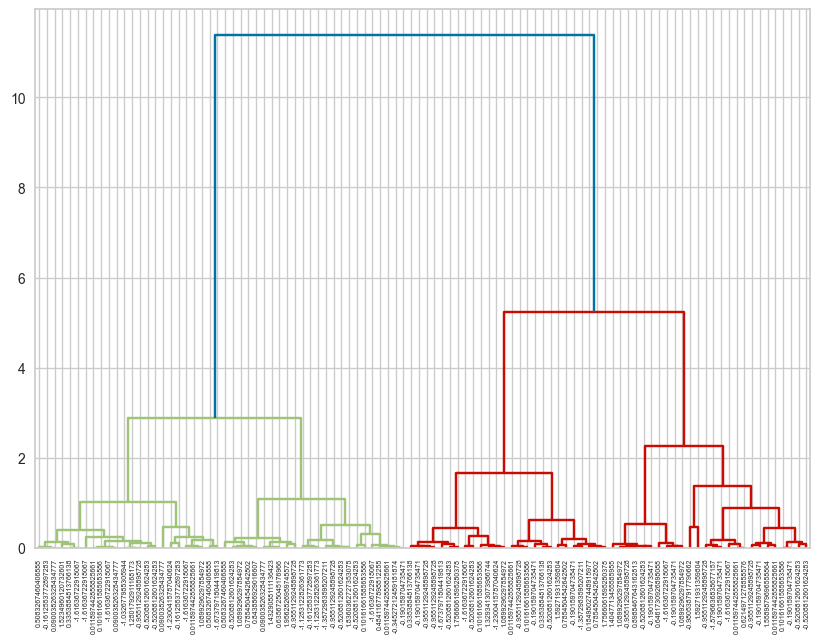

In [20]:
from scipy.spatial.distance import cdist
import matplotlib.pyplot  as plt
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage (X, method='ward')
plt.figure(figsize=(10,7))

dendro = dendrogram(linked, labels = list(Y))

I only used a sample size of 100 because when I tried to do the entire data set it would run out of memory, I am not sure if I did these alogrithims currectly. Also I going off of the tree cutting method I would guess that there would be 5 or 6 clusters

I think that K-Means is a much better approach as it is able to handle much larger data sets than hierarchy 